In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore")

In [3]:
train = pd.read_csv("C:/Users/mncedisi.mncwabe/Downloads/crop_train.csv")
test = pd.read_csv("C:/Users/mncedisi.mncwabe/Downloads/crop_test.csv")

In [4]:
train.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [5]:
test.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1


In [6]:
ID = pd.DataFrame(test.ID)

In [7]:
test = test.drop('ID',axis=1)
train = train.drop('ID',axis=1)

In [8]:
train.shape

(88858, 9)

In [9]:
test.shape

(59310, 8)

In [10]:
train.isnull().sum()

Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          9000
Number_Weeks_Quit             0
Season                        0
Crop_Damage                   0
dtype: int64

In [11]:
test.isnull().sum()

Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          5893
Number_Weeks_Quit             0
Season                        0
dtype: int64

In [14]:
missing_train = train.isnull().sum()/len(train)*100
missing_train

Estimated_Insects_Count     0.00000
Crop_Type                   0.00000
Soil_Type                   0.00000
Pesticide_Use_Category      0.00000
Number_Doses_Week           0.00000
Number_Weeks_Used          10.12852
Number_Weeks_Quit           0.00000
Season                      0.00000
Crop_Damage                 0.00000
dtype: float64

In [15]:
missing_test = train.isnull().sum()/len(test)*100
missing_test

Estimated_Insects_Count     0.000000
Crop_Type                   0.000000
Soil_Type                   0.000000
Pesticide_Use_Category      0.000000
Number_Doses_Week           0.000000
Number_Weeks_Used          15.174507
Number_Weeks_Quit           0.000000
Season                      0.000000
Crop_Damage                 0.000000
dtype: float64

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88858 entries, 0 to 88857
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Estimated_Insects_Count  88858 non-null  int64  
 1   Crop_Type                88858 non-null  int64  
 2   Soil_Type                88858 non-null  int64  
 3   Pesticide_Use_Category   88858 non-null  int64  
 4   Number_Doses_Week        88858 non-null  int64  
 5   Number_Weeks_Used        79858 non-null  float64
 6   Number_Weeks_Quit        88858 non-null  int64  
 7   Season                   88858 non-null  int64  
 8   Crop_Damage              88858 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 6.1 MB


In [17]:
train.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,79858.000000,88858.000000,88858.000000,88858.000000
mean,1399.012210,0.284375,0.458417,2.264186,25.849952,28.623970,9.589986,1.896959,0.190562
std,849.048781,0.451119,0.498271,0.461772,15.554428,12.391881,9.900631,0.701322,0.454215
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1898.000000,1.000000,1.000000,3.000000,40.000000,37.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,67.000000,50.000000,3.000000,2.000000


In [18]:
train.Number_Weeks_Used.fillna(28,inplace = True)
test.Number_Weeks_Used.fillna(28,inplace = True)

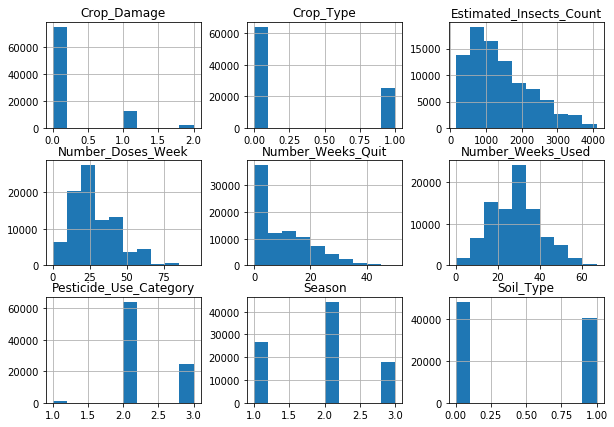

In [24]:
train.hist(bins=10,figsize=(10,7));

In [25]:
train.skew()

Estimated_Insects_Count    0.839146
Crop_Type                  0.955978
Soil_Type                  0.166914
Pesticide_Use_Category     0.779488
Number_Doses_Week          0.962879
Number_Weeks_Used          0.274030
Number_Weeks_Quit          0.892773
Season                     0.145228
Crop_Damage                2.367816
dtype: float64

In [29]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()

pt.fit(train[['Estimated_Insects_Count']])

train['Estimated_Insects_Count'] = pt.transform(train[['Estimated_Insects_Count']])

In [31]:
pt.fit(train[['Number_Weeks_Quit']])
train['Number_Weeks_Quit'] = pt.transform(train[['Number_Weeks_Quit']])

In [34]:
pt.fit(train[['Number_Doses_Week']])
train['Number_Doses_Week'] = pt.transform(train[['Number_Doses_Week']])

In [40]:
pt.fit(train[['Number_Weeks_Used']])
train['Number_Weeks_Used'] = pt.transform(train[['Number_Weeks_Used']])

In [45]:
pt.fit(test[['Estimated_Insects_Count']])
test['Estimated_Insects_Count'] = pt.transform(test[['Estimated_Insects_Count']])

pt.fit(test[['Number_Weeks_Quit']])
test['Number_Weeks_Quit'] = pt.transform(test[['Number_Weeks_Quit']])

pt.fit(test[['Number_Doses_Week']])
test['Number_Doses_Week'] = pt.transform(test[['Number_Doses_Week']])

pt.fit(test[['Number_Weeks_Used']])
test['Number_Weeks_Used'] = pt.transform(test[['Number_Weeks_Used']])

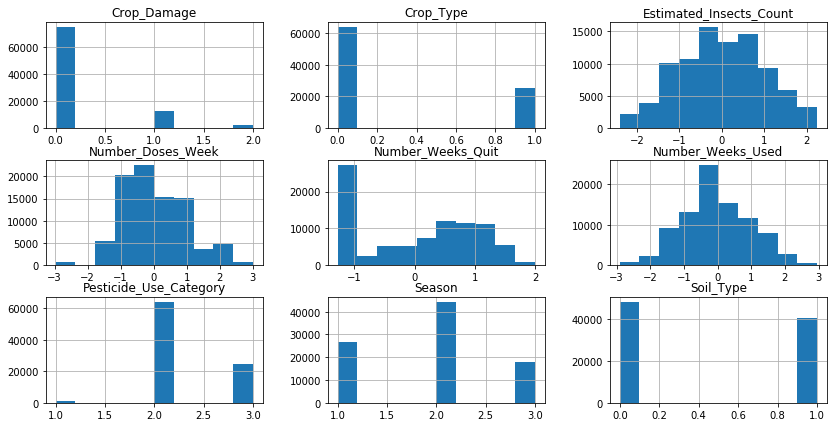

In [42]:
train.hist(bins=10,figsize=(14,7));

In [43]:
train.skew()

Estimated_Insects_Count   -0.040977
Crop_Type                  0.955978
Soil_Type                  0.166914
Pesticide_Use_Category     0.779488
Number_Doses_Week          0.002722
Number_Weeks_Used         -0.010291
Number_Weeks_Quit         -0.108017
Season                     0.145228
Crop_Damage                2.367816
dtype: float64

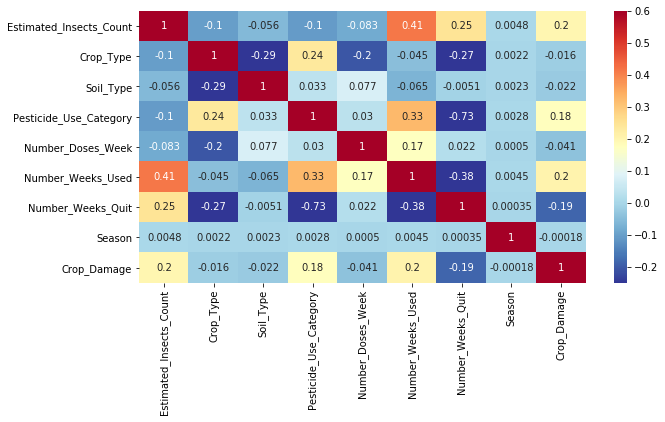

In [44]:
#heatmap to visualize correlation
plt.figure(figsize = (10,5))
sns.heatmap(train.corr(), cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import f1_score,precision_score,plot_confusion_matrix,recall_score

In [47]:
X = train.drop('Crop_Damage',axis=1)
y = train['Crop_Damage']

In [48]:
#------Split the data using 70/30 split--------

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=100)

In [49]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf.score(X_test,y_test)*100

82.30174806812214

In [53]:
# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt.score(X_test,y_test)*100

75.3169780178558

In [54]:
#Neural Network
nnt = MLPClassifier()
nnt.fit(X_train,y_train)
nnt.score(X_test,y_test)*100

84.37992347512942

In [67]:
# Logistic Regression

lm = LogisticRegression()
lm.fit(X_train,y_train)
lm.score(X_test,y_test)*100

83.20954310150799

In [55]:
# GradientBoosting
gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)
gb.score(X_test,y_test)*100

84.36491859854452

In [61]:
y_pred = nnt.predict(X_test)

Precision Score: 56.996787


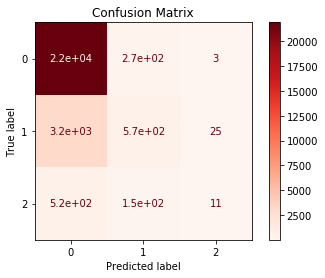

In [62]:
print("Precision Score: %f" % (precision_score(y_test, y_pred,average='macro') * 100))
plot_confusion_matrix(nnt, X_test, y_test, cmap=plt.cm.Reds)
plt.title("Confusion Matrix")
plt.show()

In [71]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92     22188
           1       0.57      0.15      0.24      3786
           2       0.28      0.02      0.03       684

    accuracy                           0.84     26658
   macro avg       0.57      0.38      0.39     26658
weighted avg       0.80      0.84      0.80     26658



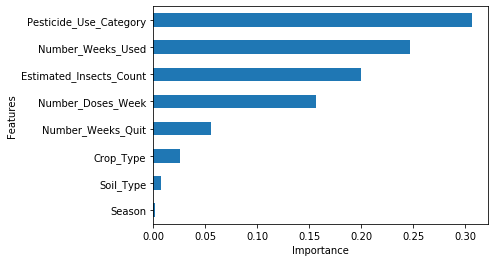

In [66]:
feat_importances = pd.Series(gb.feature_importances_, index=X_train.columns)
feat_importances.nsmallest(18).plot(kind='barh')
importances = gb.feature_importances_
indices = np.argsort(importances)


plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

In [69]:
from sklearn.metrics import mean_squared_error

In [70]:
print( np.unique(y_pred))

[0 1 2]


In [72]:
# RMSE
mean_squared_error(y_test, y_pred, squared=False)

0.4636214588201786

In [75]:
#Now Use the best model (neural network) to predict the test set
y_final = nnt.predict(test)

#Submission
submission = pd.DataFrame({
        "ID": ID["ID"],
        "Crop_Damage": y_final
    })
submission.head()
submission.to_csv('crop.csv', index=False)